# Downloading data from Kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
files.upload()

In [ ]:
!pip install -q kaggle # install kaggle api client

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d equintel/dax-esg-media-dataset
!unzip -q dax-esg-media-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/equintel/dax-esg-media-dataset
License(s): unknown
 78% 30.0M/38.2M [00:00<00:00, 155MB/s]
100% 38.2M/38.2M [00:00<00:00, 150MB/s]


# Data Loading

In [2]:
%cd /content/drive/MyDrive/MasterThesis/Data # Change the directory to the Data folder

/content/drive/MyDrive/MasterThesis/Data


In [ ]:
!pip install -qU openai tiktoken langchain langchain-community langchain-huggingface faiss-gpu sentence-transformers langchain-groq langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.5/389.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import string

In [4]:
df = pd.read_csv("./esg_documents_for_dax_companies.csv", delimiter = '|')

In [5]:
df.head()

,Unnamed: 0,company,content,datatype,date,domain,esg_topics,internal,symbol,title,url
0,2,Beiersdorf AG,Sustainability Highlight Report CARE BEYOND SK...,sustainability_report,2021-03-31,NaN,"['CleanWater', 'GHGEmission', 'ProductLiabilit...",1,BEI,BeiersdorfAG Sustainability Report 2021,NaN
1,3,Deutsche Telekom AG,Corporate Responsibility Report 2021 2 Content...,sustainability_report,2021-03-31,NaN,"['DataSecurity', 'Iso50001', 'GlobalWarming', ...",1,DTE,DeutscheTelekomAG Sustainability Report 2021,NaN
2,5,Vonovia SE,VONOVIA SE SUSTAINABILITY REPORT 2021 =For a S...,sustainability_report,2021-03-31,NaN,"['Whistleblowing', 'DataSecurity', 'Vaccine', ...",1,VNA,VonoviaSE Sustainability Report 2021,NaN
3,6,Merck KGaA,Sustainability Report 2021 TABLE OF CONTENTS S...,sustainability_report,2021-03-31,NaN,"['DataSecurity', 'DataMisuse', 'DrugResistance...",1,MRK,MerckKGaA Sustainability Report 2021,NaN
4,9,MTU,Our ideas and concepts FOR A SUSTAINABLE FUTUR...,sustainability_report,2020-03-31,NaN,"['WorkLifeBalance', 'Corruption', 'AirQuality'...",1,MTX,MTUAeroEngines Sustainability Report 2020,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11548 non-null  int64 
 1   company     11548 non-null  object
 2   content     11547 non-null  object
 3   datatype    11393 non-null  object
 4   date        11548 non-null  object
 5   domain      11456 non-null  object
 6   esg_topics  11548 non-null  object
 7   internal    11548 non-null  int64 
 8   symbol      11547 non-null  object
 9   title       11548 non-null  object
 10  url         11456 non-null  object
dtypes: int64(2), object(9)
memory usage: 992.5+ KB


# Data Cleaning and Preprocessing


In [7]:
# Remove columns which are not relevent
df.drop(['Unnamed: 0', 'url','domain', 'esg_topics'], axis=1, inplace=True)

In [8]:
df.head()

,company,content,datatype,date,internal,symbol,title
0,Beiersdorf AG,Sustainability Highlight Report CARE BEYOND SK...,sustainability_report,2021-03-31,1,BEI,BeiersdorfAG Sustainability Report 2021
1,Deutsche Telekom AG,Corporate Responsibility Report 2021 2 Content...,sustainability_report,2021-03-31,1,DTE,DeutscheTelekomAG Sustainability Report 2021
2,Vonovia SE,VONOVIA SE SUSTAINABILITY REPORT 2021 =For a S...,sustainability_report,2021-03-31,1,VNA,VonoviaSE Sustainability Report 2021
3,Merck KGaA,Sustainability Report 2021 TABLE OF CONTENTS S...,sustainability_report,2021-03-31,1,MRK,MerckKGaA Sustainability Report 2021
4,MTU,Our ideas and concepts FOR A SUSTAINABLE FUTUR...,sustainability_report,2020-03-31,1,MTX,MTUAeroEngines Sustainability Report 2020


In [9]:
import unicodedata

def normalize_unicode(text):
    """
    Normalizes Unicode text by converting it to its closest ASCII representation.
    """
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
# drop rows with NaN values in the 'content' column
df.dropna(subset=['content'], inplace=True)

# apply the normalization function to the cleaned_content column
df['content'] = df['content'].apply(normalize_unicode)

In [10]:
temp = df[df['date'].isin(["p.DE-03-31", "bayer-03-31"])]
len(temp)

17

In [11]:
temp

,company,content,datatype,date,internal,symbol,title
13,Henkel,Sustainability Report 2020 About this report T...,sustainability_report,p.DE-03-31,1,HNK,HenkelAG&CoKGaA Sustainability Report p.DE
18,Henkel,Sustainability Report 2018 About this report T...,sustainability_report,p.DE-03-31,1,HNK,HenkelAG&CoKGaA Sustainability Report p.DE
20,Bayer AG,Five-Year Summary Bayer Annual Report 2018 Fiv...,annual_report,bayer-03-31,1,BAYN,BayerAG Annual Report bayer
22,Volkswagen AG,SUSTAINABILITY REPORT 2020 CONTENTS FOREWORD A...,sustainability_report,p.DE-03-31,1,VOW3,VolkswagenAG Sustainability Report p.DE
25,Sartorius AG,Sartorius Group 2021 Annual Report Key Figures...,annual_report,p.DE-03-31,1,SRT,SartoriusAG Annual Report p.DE
26,Porsche,Courage. Annual and Sustainability Report of P...,annual_report,p.DE-03-31,1,PAH3,PorscheAutomobilHoldingSE Annual Report p.DE
31,Porsche,Responsibility. 04 LETTER FROM THE EXECUTIVE B...,annual_report,p.DE-03-31,1,PAH3,PorscheAutomobilHoldingSE Annual Report p.DE
32,Porsche,SCAN THIS CHART how to use the augmented real...,annual_report,p.DE-03-31,1,PAH3,PorscheAutomobilHoldingSE Annual Report p.DE
33,Volkswagen AG,"SUSTAINABILITY REPORT 2018 ON DECEMBER 12, 201...",sustainability_report,p.DE-03-31,1,VOW3,VolkswagenAG Sustainability Report p.DE
37,Volkswagen AG,SUSTAINABILITY REPORT 2021 NEW AUTO: VOLKSWAGE...,sustainability_report,p.DE-03-31,1,VOW3,VolkswagenAG Sustainability Report p.DE


In [12]:
print(temp['company'].unique())

['Henkel' 'Bayer AG' 'Volkswagen AG' 'Sartorius AG' 'Porsche']


In [13]:
henkel = df[df['company']=='Henkel']
volkswagen = df[df['company']=='Volkswagen AG']
sartorius = df[df['company']=='Sartorius AG']
porsche = df[df['company']=='Porsche']

In [14]:
henkel_internal = henkel[henkel['internal']==1]
volkswagen_internal = volkswagen[volkswagen['internal']==1]
sartorius_internal = sartorius[sartorius['internal']==1]
porsche_internal = porsche[porsche['internal']==1]

In [15]:
# Manually fixing the dates where values are p.DE-03-31, after checking the year in the content of sustainability reports
df.loc[13, 'date'] = '2020-03-31'
df.loc[18, 'date'] = '2018-03-31'
df.loc[22, 'date'] = '2020-03-31'
df.loc[25, 'date'] = '2021-03-31'
df.loc[26, 'date'] = '2020-03-31'
df.loc[31, 'date'] = '2021-03-31'
df.loc[32, 'date'] = '2018-03-31'
df.loc[33, 'date'] = '2018-03-31'
df.loc[37, 'date'] = '2021-03-31'
df.loc[41, 'date'] = '2019-03-31'
df.loc[50, 'date'] = '2019-03-31'
df.loc[78, 'date'] = '2018-03-31'
df.loc[80, 'date'] = '2020-03-31'
df.loc[86, 'date'] = '2021-03-31'
df.loc[87, 'date'] = '2019-03-31'
df.loc[88, 'date'] = '2019-03-31'
df.loc[20, 'date'] = '2018-03-31'

In [16]:
df['date'] = pd.to_datetime(df['date'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11547 entries, 0 to 11547
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   company   11547 non-null  object        
 1   content   11547 non-null  object        
 2   datatype  11392 non-null  object        
 3   date      11547 non-null  datetime64[ns]
 4   internal  11547 non-null  int64         
 5   symbol    11547 non-null  object        
 6   title     11547 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 979.7+ KB


In [18]:
companies = df['company'].unique()

In [19]:
unique_pairs = df[['company', 'symbol']].drop_duplicates()

In [20]:
print(len(unique_pairs))
print(unique_pairs)

41
                                                 company symbol
0                                          Beiersdorf AG    BEI
1                                    Deutsche Telekom AG    DTE
2                                             Vonovia SE    VNA
3                                             Merck KGaA    MRK
4                                                    MTU    MTX
5                                                 E ONSE   EOAN
6                                                 RWE AG    RWE
7                                   Heidelberg Cement AG    HEI
9                                             Siemens AG    SIE
10                                                 Linde    LIN
12                                                Qiagen    QIA
13                                                Henkel    HNK
15                                            Daimler AG    DAI
19                                        Continental AG    CON
20                                   

In [21]:
vonovia_reports = df[df["company"].isin({"Vonovia SE", "Vonovia"})]
print(len(vonovia_reports))

external_reports = vonovia_reports[vonovia_reports['internal'] == 0]
internal_reports = vonovia_reports[vonovia_reports['internal'] == 1]

print(internal_reports["company"].unique())
print(external_reports["company"].unique())

# VNA symbol has 2 associated company names, Vonovia SE (for internal reports) and Vonovia (for external reports).
# So, renaming Vonovia as Vonovia SE

84
['Vonovia SE']
['Vonovia']


In [22]:
# Replace 'Vonovia' with 'Vonovia SE'
df.loc[:, 'company'] = df['company'].replace('Vonovia', 'Vonovia SE')

In [23]:
bas_reports = df[df["company"].isin({"AkzoNobelNV", "BASF SE"})]
print(len(bas_reports))

internal_reports = bas_reports[bas_reports['internal'] == 1]
external_reports = bas_reports[bas_reports['internal'] == 0]

print(internal_reports["company"].unique())
print(external_reports["company"].unique())

# BAS symbol has 2 associated company names, BASF SE (for internal reports) and AkzoNobelNV (for external reports). Verified from external reports that they belong to BASF SE.
# So, renaming AkzoNobelNV as BASF SE

502
['BASF SE']
['AkzoNobelNV']


In [24]:
# Replace 'AkzoNobelNV' with 'BASF SE'
df.loc[:, 'company'] = df['company'].replace('AkzoNobelNV', 'BASF SE')

In [25]:
fre_reports = df[df["company"].isin({"Fresenius"})]
print(len(fre_reports))

internal_reports = fre_reports[fre_reports['internal'] == 1]
external_reports = fre_reports[fre_reports['internal'] == 0]

print(internal_reports["symbol"].unique())
print(external_reports["symbol"].unique())

124
['FRE' 'FME']
['FME' 'FRE']


In [26]:
internal_reports.head(10)

,company,content,datatype,date,internal,symbol,title
23,Fresenius,"Media Hub Group in figures Targets, results, a...",annual_report,2021-03-31,1,FRE,FreseniusSE Annual Report 2021
42,Fresenius,A N N U A L R E P O R T K e Y F I g U R e S EM...,annual_report,2020-03-31,1,FME,FreseniusMedicalCare Annual Report 2020
54,Fresenius,"Media Hub Group in figures Targets, results, a...",annual_report,2020-03-31,1,FRE,FreseniusSE Annual Report 2020
62,Fresenius,NON-FINANCIAL GROUP REPORT N O N - F I N A N C...,sustainability_report,2020-03-31,1,FME,FreseniusMedicalCare Sustainability Report 2020
64,Fresenius,NON-FINANCIAL G R O U P RE P O R T NON-FINANCI...,sustainability_report,2021-03-31,1,FME,FreseniusMedicalCare Sustainability Report 2021


In [27]:
# FME and FRE are 2 different companies but have same name, Fresenius. Removing FME which not a DAX company
df = df[df.symbol != 'FME']

In [28]:
company_symbol = df[['company', 'symbol']].drop_duplicates()

In [29]:
print(len(company_symbol))
print(company_symbol)

38
                                              company symbol
0                                       Beiersdorf AG    BEI
1                                 Deutsche Telekom AG    DTE
2                                          Vonovia SE    VNA
3                                          Merck KGaA    MRK
4                                                 MTU    MTX
5                                              E ONSE   EOAN
6                                              RWE AG    RWE
7                                Heidelberg Cement AG    HEI
9                                          Siemens AG    SIE
10                                              Linde    LIN
12                                             Qiagen    QIA
13                                             Henkel    HNK
15                                         Daimler AG    DAI
19                                     Continental AG    CON
20                                           Bayer AG   BAYN
22                   

In [30]:
company_symbol.to_csv('company_symbol.csv', index=False)

In [31]:
# Filter companies that have both internal values 0 and 1
filtered_df = df.groupby('company').filter(lambda x: set(x['internal']) == {0, 1})
filtered_companies = filtered_df['company'].unique()

In [32]:
len(filtered_df)

11504

In [33]:
print(len(filtered_companies))
print(filtered_companies)

38
['Beiersdorf AG' 'Deutsche Telekom AG' 'Vonovia SE' 'Merck KGaA' 'MTU'
 'E ONSE' 'RWE AG' 'Heidelberg Cement AG' 'Siemens AG' 'Linde' 'Qiagen'
 'Henkel' 'Daimler AG' 'Continental AG' 'Bayer AG' 'Volkswagen AG'
 'Fresenius' 'Symrise AG' 'Sartorius AG' 'Porsche' 'SAP' 'Adidas AG'
 'Deutsche Bank AG' 'Puma SE' 'Siemens Healthineers AG' 'Airbus SE'
 'Covestro AG' 'Allianz SE' 'Infineon Technologies AG' 'BMW'
 'Hannover R AG' 'Siemens Energy' 'Zalando SE'
 'Muenchener Rueckversicherungs Gesellschaft AGin Muenchen'
 'Deutsche Post AG' 'BASF SE' 'Deutsche Boerse AG' 'Brenntag']


In [34]:
lowest_date = df['date'].min()
highest_date = df['date'].max()

print("Lowest Date:", lowest_date)
print("Highest Date:", highest_date)

Lowest Date: 2018-03-31 00:00:00
Highest Date: 2023-06-02 00:00:00


In [37]:
# Truncate company names to their initial few characters
df_truncated = df.groupby("company")["content"].count().sort_values().reset_index()
df_truncated["company"] = df_truncated["company"].str[:25]

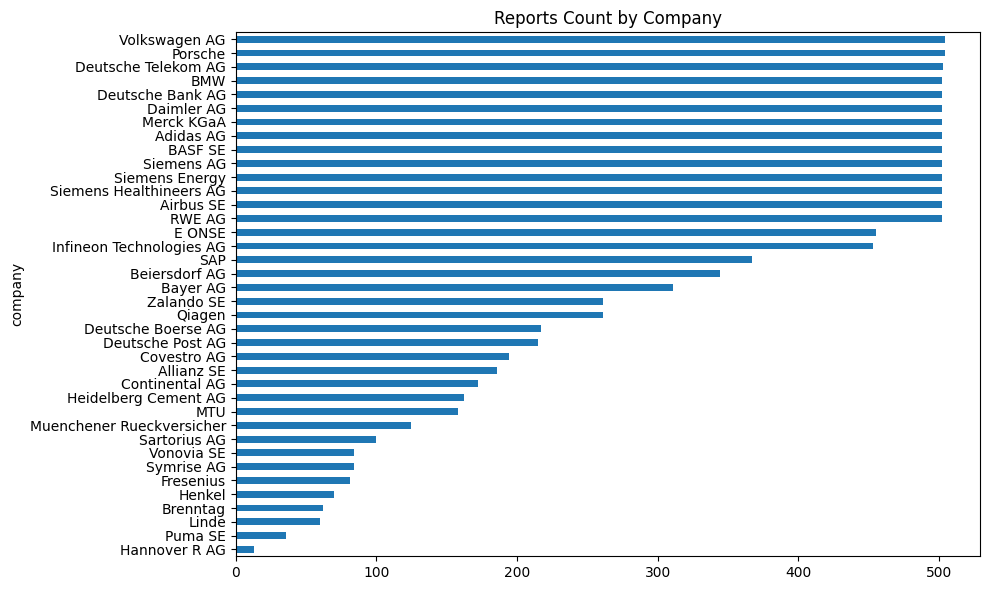

In [40]:
import matplotlib.pyplot as plt
# Plot the data as a horizontal bar chart
df_truncated.set_index("company")["content"].plot(kind="barh", figsize=(10, 6))
plt.title("Reports Count by Company")  # Add a title
plt.tight_layout()  # Adjust layout for better fit
plt.show()

In [71]:
df.head()

,company,content,datatype,date,esg_topics,internal,symbol,title
0,Beiersdorf AG,Sustainability Highlight Report CARE BEYOND SK...,sustainability_report,2021-03-31,"['CleanWater', 'GHGEmission', 'ProductLiabilit...",1,BEI,BeiersdorfAG Sustainability Report 2021
1,Deutsche Telekom AG,Corporate Responsibility Report 2021 2 Content...,sustainability_report,2021-03-31,"['DataSecurity', 'Iso50001', 'GlobalWarming', ...",1,DTE,DeutscheTelekomAG Sustainability Report 2021
2,Vonovia SE,VONOVIA SE SUSTAINABILITY REPORT 2021 =For a S...,sustainability_report,2021-03-31,"['Whistleblowing', 'DataSecurity', 'Vaccine', ...",1,VNA,VonoviaSE Sustainability Report 2021
3,Merck KGaA,Sustainability Report 2021 TABLE OF CONTENTS S...,sustainability_report,2021-03-31,"['DataSecurity', 'DataMisuse', 'DrugResistance...",1,MRK,MerckKGaA Sustainability Report 2021
4,MTU,Our ideas and concepts FOR A SUSTAINABLE FUTUR...,sustainability_report,2020-03-31,"['WorkLifeBalance', 'Corruption', 'AirQuality'...",1,MTX,MTUAeroEngines Sustainability Report 2020


In [72]:
df.to_csv("cleaned_dax_reports.csv", index=False)

# Loading cleaned data and filtering for specific years

In [41]:
reports = pd.read_csv("./cleaned_dax_reports.csv", parse_dates=['date'])

In [42]:
reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504 entries, 0 to 11503
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   company     11504 non-null  object        
 1   content     11504 non-null  object        
 2   datatype    11349 non-null  object        
 3   date        11504 non-null  datetime64[ns]
 4   esg_topics  11504 non-null  object        
 5   internal    11504 non-null  int64         
 6   symbol      11504 non-null  object        
 7   title       11504 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 719.1+ KB


In [43]:
company_symbol = reports[['company', 'symbol']].drop_duplicates()

In [44]:
# The list of symbols is for those companies who don't have esg score on yahoo finance for 2021 and 2022
companies_with_missing_esg_data = company_symbol[company_symbol['symbol'].isin(['PUM', 'HNK', 'SRT', 'SHL', 'ENR'])]
companies_with_missing_esg_data = companies_with_missing_esg_data['company'].to_numpy()

In [45]:
companies_with_missing_esg_data

array(['Henkel', 'Sartorius AG', 'Puma SE', 'Siemens Healthineers AG',
       'Siemens Energy'], dtype=object)

In [46]:
reports['publish_year'] = np.where(reports['internal'] == 1, reports['date'].dt.year + 1, reports['date'].dt.year)

In [47]:
reports.head()

,company,content,datatype,date,esg_topics,internal,symbol,title,publish_year
0,Beiersdorf AG,Sustainability Highlight Report CARE BEYOND SK...,sustainability_report,2021-03-31,"['CleanWater', 'GHGEmission', 'ProductLiabilit...",1,BEI,BeiersdorfAG Sustainability Report 2021,2022
1,Deutsche Telekom AG,Corporate Responsibility Report 2021 2 Content...,sustainability_report,2021-03-31,"['DataSecurity', 'Iso50001', 'GlobalWarming', ...",1,DTE,DeutscheTelekomAG Sustainability Report 2021,2022
2,Vonovia SE,VONOVIA SE SUSTAINABILITY REPORT 2021 =For a S...,sustainability_report,2021-03-31,"['Whistleblowing', 'DataSecurity', 'Vaccine', ...",1,VNA,VonoviaSE Sustainability Report 2021,2022
3,Merck KGaA,Sustainability Report 2021 TABLE OF CONTENTS S...,sustainability_report,2021-03-31,"['DataSecurity', 'DataMisuse', 'DrugResistance...",1,MRK,MerckKGaA Sustainability Report 2021,2022
4,MTU,Our ideas and concepts FOR A SUSTAINABLE FUTUR...,sustainability_report,2020-03-31,"['WorkLifeBalance', 'Corruption', 'AirQuality'...",1,MTX,MTUAeroEngines Sustainability Report 2020,2021


In [48]:
internal_reports = reports[reports['internal']==1]
external_reports = reports[reports['internal']==0]

In [49]:
len(internal_reports)

88

In [50]:
lowest_year = internal_reports['publish_year'].min()
highest_year = internal_reports['publish_year'].max()

print("Lowest year:", lowest_year)
print("Highest year:", highest_year)

Lowest year: 2019
Highest year: 2022


In [51]:
lowest_date = external_reports['date'].min()
highest_date = external_reports['date'].max()

print("Lowest Date:", lowest_date)
print("Highest Date:", highest_date)

Lowest Date: 2021-01-01 00:00:00
Highest Date: 2023-06-02 00:00:00


<Axes: xlabel='company'>

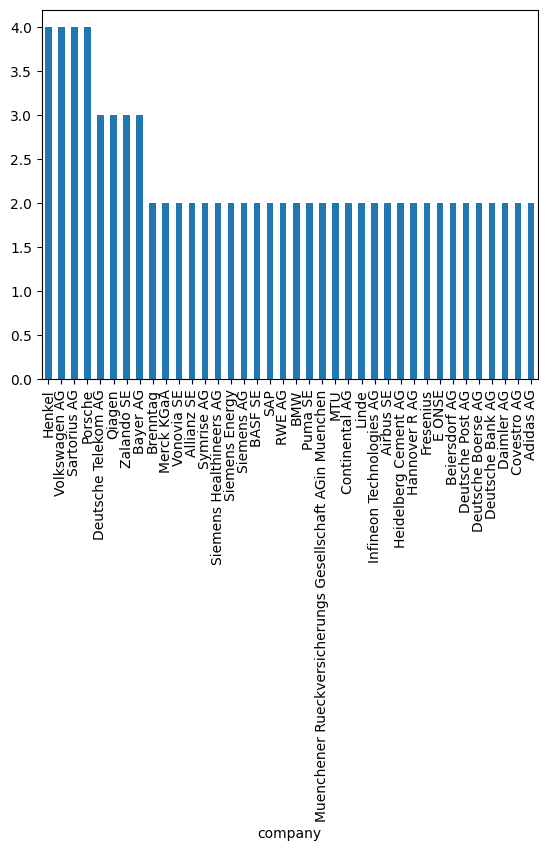

In [52]:
internal_reports.groupby("company")["content"].count().sort_values(ascending=False).plot(kind="bar")

In [53]:
internal_reports_filtered = internal_reports[internal_reports['publish_year'] >= 2021]
external_reports_filtered = external_reports[external_reports['publish_year'] <= 2022]

In [54]:
print(len(internal_reports_filtered))
print(len(external_reports_filtered))

79
10273


<Axes: xlabel='company'>

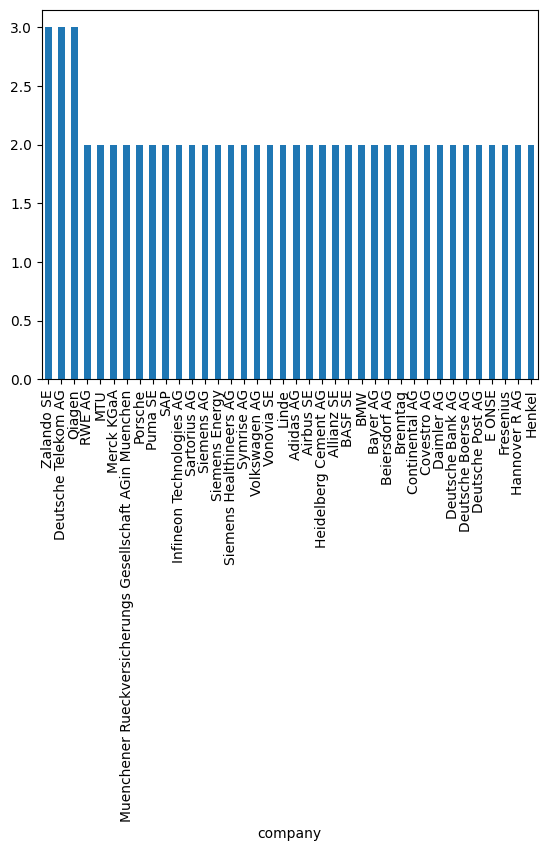

In [55]:
internal_reports_filtered.groupby("company")["content"].count().sort_values(ascending=False).plot(kind="bar")

<Axes: xlabel='company'>

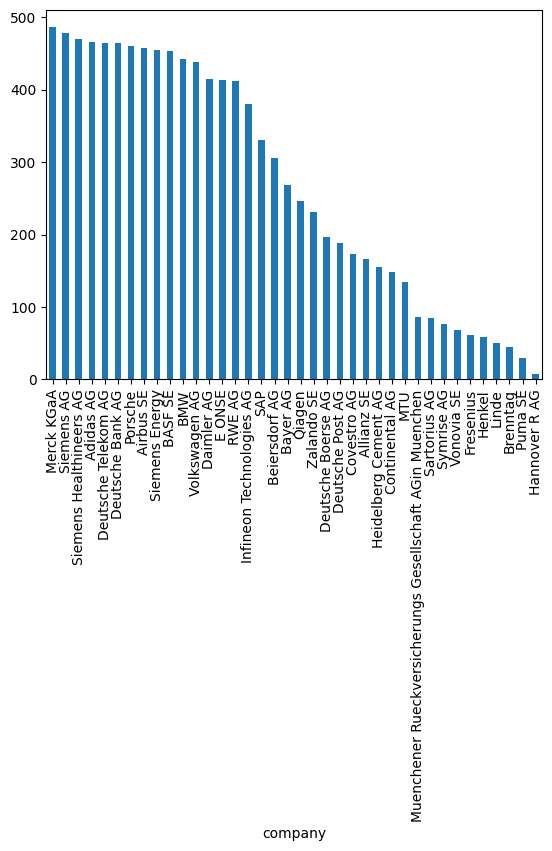

In [56]:
external_reports_filtered.groupby("company")["content"].count().sort_values(ascending=False).plot(kind="bar")

<Axes: xlabel='datatype'>

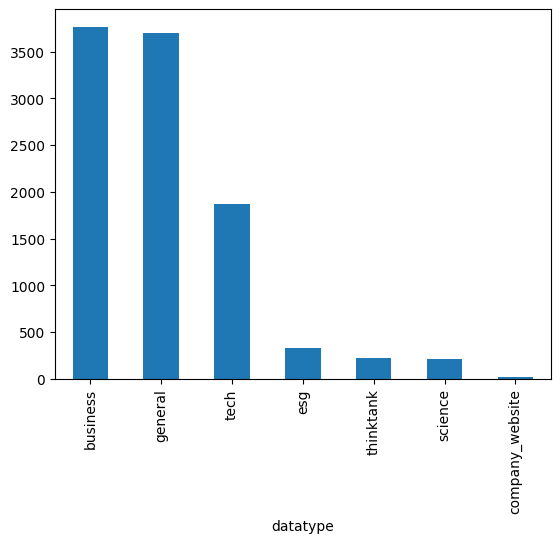

In [57]:
external_reports_filtered.groupby("datatype")["content"].count().sort_values(ascending=False).plot(kind="bar")

# Loading SDGs data and build sdg queries

In [ ]:
sdgs = pd.read_csv("./sdg_descriptions_with_targetsText.csv")

In [ ]:
sdgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  17 non-null     int64 
 1   name                17 non-null     object
 2   description         17 non-null     object
 3   targets             17 non-null     object
 4   targets_json_array  17 non-null     object
 5   progress            17 non-null     object
dtypes: int64(1), object(5)
memory usage: 944.0+ bytes


In [ ]:
sdgs.head(20)

,id,name,description,targets,targets_json_array,progress
0,1,No Poverty,End poverty in all its forms everywhere,"['1.1', 'By 2030, eradicate extreme poverty fo...","[{""target"":""1.1"",""description"":""By 2030, eradi...",['The impact of the COVID-19 pandemic reversed...
1,2,Zero Hunger,"End hunger, achieve food security and improved...","['2.1', 'By 2030, end hunger and ensure access...","[{""target"":""2.1"",""description"":""By 2030, end h...","['Between 2014 and the onset of the pandemic, ..."
2,3,Good Health and Well-being,Ensure healthy lives and promote well-being fo...,"['3.1', 'By 2030, reduce the global maternal m...","[{""target"":""3.1"",""description"":""By 2030, reduc...","['By April 2022, the coronavirus causing COVID..."
3,4,Quality Education,Ensure inclusive and equitable quality educati...,"['4.1', 'By 2030, ensure that all girls and bo...","[{""target"":""4.1"",""description"":""By 2030, ensur...",['The COVID-19 outbreak has caused a global ed...
4,5,Gender Equality,Achieve gender equality and empower all women ...,"['5.1', 'End all forms of discrimination again...","[{""target"":""5.1"",""description"":""End all forms ...","[""The world is not on track to achieve gender ..."
5,6,Clean Water and Sanitation,Ensure availability and sustainable management...,"['6.1', 'By 2030, achieve universal and equita...","[{""target"":""6.1"",""description"":""By 2030, achie...","['Access to safe water, sanitation and hygiene..."
6,7,Affordable and Clean Energy,"Ensure access to affordable, reliable, sustain...","['7.1', 'By 2030, ensure universal access to a...","[{""target"":""7.1"",""description"":""By 2030, ensur...","['Despite progress, there are still over 700 m..."
7,8,Decent Work and Economic Growth,"Promote sustained, inclusive and sustainable e...","['8.1', 'Sustain per capita economic growth in...","[{""target"":""8.1"",""description"":""Sustain per ca...","['In 2020, the COVID-19 pandemic unleashed the..."
8,9,"Industry, Innovation and Infrastructure","Build resilient infrastructure, promote inclus...","['9.1', 'Develop quality, reliable, sustainabl...","[{""target"":""9.1"",""description"":""Develop qualit...",['The manufacturing industry exhibited a recov...
9,10,Reduced Inequalities,Reduce inequality within and among countries,"['10.1', 'By 2030, progressively achieve and s...","[{""target"":""10.1"",""description"":""By 2030, prog...",['The COVID-19 crisis has exacerbated global i...


In [ ]:
sdgs["targets_json_array"][0]

'[{"target":"1.1","description":"By 2030, eradicate extreme poverty for all people everywhere, currently measured as people living on less than $1.25 a day","indicators":[{"target":"1.1.1","description":"Proportion of the population living below the international poverty line by sex, age, employment status and geographical location (urban/rural)"}]},{"target":"1.2","description":"By 2030, reduce at least by half the proportion of men, women and children of all ages living in poverty in all its dimensions according to national definitions","indicators":[{"target":"1.2.1","description":"Proportion of population living below the national poverty line, by sex and age"},{"target":"1.2.2","description":"Proportion of men, women and children of all ages living in poverty in all its dimensions according to national definitions"}]},{"target":"1.3","description":"Implement nationally appropriate social protection systems and measures for all, including floors, and by 2030 achieve substantial cov

In [ ]:
# def build_sdg_queries(df, company):
#     queries = []
#     for index, row in df.iterrows():

#         sdg_name = row["name"]
#         sdg_description = row["description"]
#         sdg_targets = row["targets"]

#         sdg_internal_reports_query = f"What are the specific claims, initiatives, and actions of {company} to support the United Nations Sustainable Development Goal (SDG) related to {sdg_name} ({sdg_description})? Provide details on any strategies, policies, or results linked to this goal."
#         sdg_external_reports_query = f"What have third-party reports, such as NGO assessments, media articles, and industry publications, said about {company}'s approach to {sdg_name} ({sdg_description})? Focus on external evaluations, criticisms, and recognitions."

#         query_dict = {
#             "sdg_name": sdg_name,
#             "sdg_targets": sdg_targets,
#             "company": company,
#             "sdg_internal_reports_query": sdg_internal_reports_query,
#             "sdg_external_reports_query": sdg_external_reports_query
#         }

#         # Append the query to the list
#         queries.append(query_dict)

#     return queries

In [ ]:
# sdg_queries = build_sdg_queries(sdgs, company)
# for query in sdg_queries:
#     print(query)

In [ ]:
def build_sdg_queries(company, sdg_name, sdg_description):
    sdg_internal_reports_query = f"What are the claims and actions of {company} related to {sdg_name} ({sdg_description})?"
    sdg_external_reports_query = f"What have third-party reports said about {company}'s approach to {sdg_name} ({sdg_description})?"

    return sdg_internal_reports_query, sdg_external_reports_query

# Initialize embedding_model, prompts and llm

In [ ]:
import os
from langchain import OpenAI
from langchain_openai import ChatOpenAI
from langchain_huggingface import HuggingFaceEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.docstore.document import Document
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate
from langchain_community.vectorstores import FAISS
from langchain.schema import StrOutputParser
from langchain_core.output_parsers import JsonOutputParser

In [ ]:
#import torch
# Create embeddings
#device = 'cuda' if torch.cuda.is_available() else 'cpu'

model_name = "sentence-transformers/all-mpnet-base-v2"
model_kwargs = {'device': "cpu"}
encode_kwargs = {'normalize_embeddings': False}
embeddings = HuggingFaceEmbeddings(
    model_name=model_name,     # Provide the pre-trained model's path
    model_kwargs=model_kwargs, # Pass the model configuration options
    encode_kwargs=encode_kwargs # Pass the encoding options
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)

In [ ]:
def embed_and_create_vectors(df, embeddings, splitter):

    # Create FAISS vector index for the documents
    documents = []
    for _, row in df.iterrows():
        chunks = splitter.create_documents([row['content']])
        documents.extend(chunks)

    vector_index = FAISS.from_documents(documents, embeddings)

    return vector_index

In [ ]:
# Initialize OpenAI chat model
llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0.3,
    api_key="...." # Insert OpenAI API key here
    )



In [ ]:
# from langchain_groq import ChatGroq

# llm = ChatGroq(
#    model="llama-3.1-70b-versatile",
#    api_key = "....", #Insert ChatGroq key here, if Meta's models are to be used
#    temperature=0
# )

In [ ]:
## Example invocation
response = llm.invoke("What is the capital of Florida?")
print(response)

content='The capital of Florida is Tallahassee.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 14, 'total_tokens': 23, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0705bf87c0', 'finish_reason': 'stop', 'logprobs': None} id='run-0fd445d8-fb63-46b7-b0e7-81a7599622d8-0' usage_metadata={'input_tokens': 14, 'output_tokens': 9, 'total_tokens': 23, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [ ]:
from pydantic import BaseModel, Field
from typing import List

In [ ]:
class InternalIndicator(BaseModel):
    indicator: str = Field(description="Greenwashing indicator to be accessed")
    score: int = Field(description="Score from 0 to 5 based on the level of greenwashing indicator present")
    justification: str = Field(description="Evaluation for the assigned score")

class InternalIndicators(BaseModel):
    indicators: List[InternalIndicator] = Field(description="List of internal greenwashing indicators")

# Set up a parser + inject instructions into the prompt template.
internal_indicators_parser = JsonOutputParser(pydantic_object=InternalIndicators)

In [ ]:
class Discrepancy(BaseModel):
    name: str = Field(description="The identified discrepancy")
    description: str = Field(description="Detailed evaluation of the discrepancy between the internal and external reports")

class Discrepancies(BaseModel):
    discrepancies: List[Discrepancy] = Field(description="List of identified discrepancies and their descriptions")
    score: int = Field(description="Score from 0 to 5 based on the level of discrepancies present")

# Set up a parser + inject instructions into the prompt template.
discrepancies_parser = JsonOutputParser(pydantic_object=Discrepancies)

In [ ]:
greenwashing_internal_indicators_prompt = f"""
    ### RETRIEVED TEXT FROM INTERNAL SUSTAINABILITY REPORT:
    {retrieved_section}

    ### INSTRUCTION
    You are an expert in sustainability and corporate ESG practices. Your task is to evaluate the above retrieved sustainability claims of
    company {company} in relation to a specific Sustainable Development Goal (SDG), the name and targets of which are described below.
    Please evaluate the company's claims for potential signs of greenwashing based on the following indicators, and assign a score from 0 to 5
    for each indicator where 0 means no sign of greenwashing and 5 means strong signs of greenwashing and include a justification for each score:

    1. Vagueness of Claims: Are the claims vague or overly general without specific actions or evidence?
    2. Lack of Measurable Targets: Are there measurable targets, data, or timeframes provided to back up the claims?
    3. Overstated Achievements: Does the report seem to overstate the company's achievements without strong backing?
    4. Misalignment with SDG Targets: Are the claims aligned with the SDG targets, or are they misleading?

    Be lenient in scoring as the internal data might not be exhaustive.

    ### SDG name and targets:
    SDG Name: {sdg_name}
    SDG targets and indicators: {sdg_targets}

    {format_instructions}
    ### NO PREAMBLE
    """

In [ ]:
# Function to evaluate internal greenwashing indicators from internal reports

def evaluate_internal_indicators(retrieved_docs, sdg_name, sdg_targets, company):

    retrieved_docs = "\n".join([doc.page_content for doc in retrieved_docs])

    greenwashing_prompt = PromptTemplate(
        input_variables=["retrieved_section", "sdg_name", "sdg_targets", "company"],
        template=greenwashing_internal_indicators_prompt,
        partial_variables={"format_instructions": internal_indicators_parser.get_format_instructions()},
    )

    qa_chain = greenwashing_prompt | llm | internal_indicators_parser

    return qa_chain.invoke(input = {"retrieved_section": retrieved_docs,
                                    "sdg_name": sdg_name,
                                    "sdg_targets": sdg_targets,
                                    "company": company})


In [ ]:
discrepancy_prompt_template = f"""
    ### RETRIEVED TEXT FROM INTERNAL SUSTAINABILITY REPORT:
    {retrieved_section_internal}

    ### RETRIEVED TEXT FROM EXTERNAL MEDIA (such as the business press, publications from non-governmental organizations (NGOs), and think tanks):
    {retrieved_section_external}

    ### INSTRUCTION
    You are an expert in sustainability and corporate ESG practices. Your task is to assess any discrepancies between the sustainability claims made
    by {company} in their internal sustainability report and the information provided in external media sources, specifically in relation to the
    Sustainable Development Goal (SDG) described below. Focus on identifying instances where the company makes positive claims or highlights achievements,
    but external sources raise contradictory or negative findings, such as criticisms, unfulfilled commitments, or performance gaps.

    If discrepancies are found, clearly describe the nature of these discrepancies, especially highlighting contradictions between positive claims
    by the company and negative assessments or concerns from external sources. Finally, assign a discrepancy score between 0 and 5 where 0 indicates
    no discrepancies and 5 indicates major discrepancies.

    Be lenient in scoring as the external data might not be exhaustive.

    ### SDG name and targets:
    SDG Name: {sdg_name}
    SDG targets and indicators: {sdg_targets}

    {format_instructions}
    ### NO PREAMBLE
    """


In [ ]:
def evaluate_discrepancy_indicator(internal_docs, external_docs, sdg_name, sdg_targets, company):

    # Aggregate external data content for comparison
    internal_docs_content = "\n".join([doc.page_content for doc in internal_docs])
    external_docs_content = "\n".join([doc.page_content for doc in external_docs])

    discrepancy_prompt = PromptTemplate(
        input_variables = ["retrieved_section_internal", "retrieved_section_external", "sdg_name", "sdg_targets", "company"],
        template = discrepancy_prompt_template,
        partial_variables={"format_instructions": discrepancies_parser.get_format_instructions()},
    )

    qa_chain = discrepancy_prompt | llm | discrepancies_parser

    return qa_chain.invoke(input = {"retrieved_section_internal": internal_docs_content,
                                    "retrieved_section_external": external_docs_content,
                                    "sdg_name": sdg_name,
                                    "sdg_targets": sdg_targets,
                                    "company": company})


In [ ]:
def calculate_greenwashing_likelihood(internal_indicators, discrepancy_indicator, weights):

    total_score = 0

    # Iterate over each indicator in the list
    for item in internal_indicators.get('indicators'):
        indicator_name = item["indicator"]
        score = item["score"]

        # Get the weight for the current indicator, default to 0 if not found
        weight = weights.get(indicator_name, 0)

        # Multiply the score by the weight and add to the total score
        total_score += score * weight

    # Add the 'Discrepancy with External Data' score from the separate JSON
    discrepancy_score = discrepancy_indicator.get('score', 0)
    discrepancy_weight = weights.get('Discrepancy with External Data', 0)

    total_score += discrepancy_score * discrepancy_weight

    return round(total_score, 2)


In [ ]:
indicator_weights = {
    'Vagueness of Claims': 0.1,
    'Overstated Achievements': 0.1,
    'Lack of Measurable Targets': 0.2,
    'Misalignment with SDG Targets': 0.2,
    'Discrepancy with External Data': 0.4
}

# Analysis for DTE for specific SDGs

In [ ]:
dt_internal_reports = internal_reports_filtered[internal_reports_filtered["company"]=="Deutsche Telekom AG"]
dt_external_reports = external_reports_filtered[external_reports_filtered["company"]=="Deutsche Telekom AG"]

In [ ]:
lowest_date = dt_external_reports['date'].min()
highest_date = dt_external_reports['date'].max()

print("Lowest Date:", lowest_date)
print("Highest Date:", highest_date)

Lowest Date: 2021-01-05 00:00:00
Highest Date: 2022-12-23 00:00:00


In [ ]:
dt_internal_reports.head()

,company,content,datatype,date,esg_topics,internal,symbol,title,publish_year
1,Deutsche Telekom AG,Corporate Responsibility Report 2021 2 Content...,sustainability_report,2021-03-31,"['DataSecurity', 'Iso50001', 'GlobalWarming', ...",1,DTE,DeutscheTelekomAG Sustainability Report 2021,2022
20,Deutsche Telekom AG,Corporate Responsibility Report 2020 Contents ...,sustainability_report,2020-03-31,"['DataSecurity', 'Iso50001', 'NaturalResources...",1,DTE,DeutscheTelekomAG Sustainability Report 2020,2021
81,Deutsche Telekom AG,Annual Report 2021 FOR ALL WHO KEEP THE WORLD ...,annual_report,2021-03-31,"['Whistleblowing', 'Vaccine', 'Corruption', 'D...",1,DTE,DeutscheTelekomAG Annual Report 2021,2022


In [ ]:
# Filtering reports for year 2021
dt_2021_internal = dt_internal_reports[dt_internal_reports["publish_year"]==2021]
dt_2021_external = dt_external_reports[dt_external_reports["publish_year"]==2021]

In [ ]:
# Analysis for SDG 13 Climate Action
sdg_name = sdgs["name"][12]
sdg_description = sdgs["description"][12]
sdg_targets = sdgs["targets"][12]

internal_query, external_query = build_sdg_queries("Deutsche Telekom AG", sdg_name, sdg_description)

print(internal_query)
print(external_query)

What are the claims and actions of Deutsche Telekom AG related to Climate Action (Take urgent action to combat climate change and its impacts)?
What have third-party reports said about Deutsche Telekom AG's approach to Climate Action (Take urgent action to combat climate change and its impacts)?


In [ ]:
vector_index_internal = embed_and_create_vectors(dt_2021_internal, embeddings, splitter)
vector_index_external = embed_and_create_vectors(dt_2021_external, embeddings, splitter)

In [ ]:
# # Save the FAISS vector store containing the sustainability reports
# vector_store_internal_reports.save_local("vector_index_internal")
# vector_store_external_reports.save_local("vector_index_external")

In [ ]:
# # Load the FAISS vector store from the saved index
# vector_store_internal_reports = FAISS.load_local("vector_store_internal_reports", embeddings, allow_dangerous_deserialization=True)
# vector_store_external_reports = FAISS.load_local("vector_store_external_reports", embeddings, allow_dangerous_deserialization=True)

In [ ]:
internal_reports_retriever = vector_index_internal.as_retriever(search_type="similarity_score_threshold", search_kwargs={"score_threshold": 0.5})
internal_docs = internal_reports_retriever.invoke(internal_query)
print(len(internal_docs))
for doc in internal_docs:
    print(doc.page_content)

4
of the quarterly reporting to the responsible Board member (CHRO). * The Audit Committee of the Supervisory Board appraises the risks at its meetings, and the main relevant risks for the Deutsche Telekom Group are also integrated into our Annual Report. * The CR-Board is informed about climate protection issues based on requirements. * Risk reporting will be expanded to encompass even more comprehensive inclusion of long-term climate-related risks. * Financial implications have been integrated into business planning; further management instruments are evaluated for integrating climate protection into investment decision-making (e.g. internal price on carbon). * Deutsche Telekoms Board of Management decided on a new climate pro- tection strategy for 2030 including a Science-Based Target. * The overarching corporate strategy was extended at the end of 2019 by acting responsibly. This puts a major focus on CO2 and resource reduc- tion as part of Telekoms strategic direction. * As part o

In [ ]:
external_reports_retriever = vector_index_external.as_retriever(search_type="similarity_score_threshold", search_kwargs={"score_threshold": 0.4})
external_docs = external_reports_retriever.invoke(external_query)
print(len(external_docs))
for doc in external_docs:
    print(doc.page_content)

4
from the atmosphere, including planting trees to capture CO2 or even rewilding projects for bogs. Other initiatives include increasing use of renewable energy, with the company having a target to source 100% of the electricity used from renewables by the end of this year. Tim Hottges, Chairman of the Board of Management of Deutsche Telekom, said:  The systematic efforts we have made for climate protection in the past two years have paid off.. This is not the time to be smug and give ourselves a pat on the back, however. The data is clear: this is a decisive decade for the global climate. We at Deutsche Telekom are actively leading by example: by 2025, we want to reduce our in-house emissions by up to 95 percent compared to 2017. We will neutralize the last five or so percent of our carbon footprint through high-value carbon capture projects. In a future-proof economy the goal must be to achieve net zero.
Telecommunications giant Deutsche Telekom announced a significant acceleration o

In [ ]:
internal_indicators = evaluate_internal_indicators(internal_docs, sdg_name, sdg_targets, "Deutsche Telekom AG")
print(internal_indicators)

{'indicators': [{'indicator': 'Vagueness of Claims', 'score': 2, 'justification': "The report mentions specific actions such as 'expanding our existing commitment to climate, environmental protection and resource conservation' and 'integrating climate protection into investment decision-making'. However, some claims like 'acting responsibly' and 'caring for our planet' are vague and lack concrete evidence."}, {'indicator': 'Lack of Measurable Targets', 'score': 3, 'justification': "The report mentions some measurable targets such as 'Science-Based Target' and 'reducing CO2 and resource'. However, it lacks specific data and timeframes to back up these claims. The report also mentions 'leading climate protection KPIs (Energy Intensity, Carbon Intensity)' but does not provide any data or targets for these KPIs."}, {'indicator': 'Overstated Achievements', 'score': 1, 'justification': "The report seems to provide a balanced view of the company's achievements and challenges. It mentions 'int

In [ ]:
discrepancy_indicator = evaluate_discrepancy_indicator(internal_docs, external_docs, sdg_name, sdg_targets, "Deutsche Telekom AG")
print(discrepancy_indicator)

{'discrepancies': [{'name': 'Discrepancy in climate target achievement', 'description': "The internal report mentions that Deutsche Telekom's Board of Management is informed every year about the status of the company's climate target achievement and climate protection issues in the Climate Target Monitoring Board Report. However, the external media source states that the company has accelerated its climate targets, including bringing forward its goal to be a net zero company by 10 years to 2040. This suggests a potential discrepancy between the company's internal reporting and external communication on climate target achievement."}, {'name': 'Discrepancy in Scope 3 emissions reduction', 'description': "The internal report mentions that the company is working to reduce its Scope 3 emissions, but the external media source states that the company plans to completely eliminate its carbon footprint by 2040, achieving net zero in Scope 3 emissions. This suggests a potential discrepancy betwe

In [ ]:
greenwashing_score = calculate_greenwashing_likelihood(internal_indicators, discrepancy_indicator, indicator_weights)
print(greenwashing_score)

2.3


In [ ]:
# Analysis for SDG 9 Industry, Innovation and Infrastructure
sdg_name = sdgs["name"][8]
sdg_description = sdgs["description"][8]
sdg_targets = sdgs["targets"][8]

internal_query, external_query = build_sdg_queries("Deutsche Telekom AG", sdg_name, sdg_description)

print(internal_query)
print(external_query)

vector_index_internal = embed_and_create_vectors(dt_2021_internal, embeddings, splitter)
vector_index_external = embed_and_create_vectors(dt_2021_external, embeddings, splitter)

What are the claims and actions of Deutsche Telekom AG related to Industry, Innovation and Infrastructure (Build resilient infrastructure, promote inclusive and sustainable industrialization and foster innovation)?
What have third-party reports said about Deutsche Telekom AG's approach to Industry, Innovation and Infrastructure (Build resilient infrastructure, promote inclusive and sustainable industrialization and foster innovation)?


In [ ]:
internal_reports_retriever = vector_index_internal.as_retriever(search_type="similarity_score_threshold", search_kwargs={"score_threshold": 0.5})
external_reports_retriever = vector_index_external.as_retriever(search_type="similarity_score_threshold", search_kwargs={"score_threshold": 0.4})

internal_docs = internal_reports_retriever.invoke(internal_query)
print(len(internal_docs))
for doc in internal_docs:
    print(doc.page_content)

external_docs = external_reports_retriever.invoke(external_query)
print(len(external_docs))
for doc in external_docs:
    print(doc.page_content)

4
our daily work and our offerings. We promote media and democratic literacy in society, so that people Timotheus Hottges, Chairman of the Board of Management, Bonn, Germany can navigate the internet securely and independently. We sent a clear signal in 2020 for more online civil courage with our #TAKEPART  No hate speech campaign. In the last 25 years, Deutsche Telekom has adapted time and again: to technological change, to the new needs of our customers, and to growing social expectations. In 2020, we once again demonstrated that our digital solutions can help solve urgent challenges.We report extensively on these and other sustainability activities in this years Sustainability Report. We remain committed to the principles of the United Nations Global Compact and the German Sustainability Code. Both of these frameworks, along with the UN Sustainable Development Goals, guide us in what we do. We live in a time of profound change. Let us face the upcoming challenges together. Best
can 

In [ ]:
internal_indicators = evaluate_internal_indicators(internal_docs, sdg_name, sdg_targets, "Deutsche Telekom AG")
print(internal_indicators)

discrepancy_indicator = evaluate_discrepancy_indicator(internal_docs, external_docs, sdg_name, sdg_targets, "Deutsche Telekom AG")
print(discrepancy_indicator)

greenwashing_score = calculate_greenwashing_likelihood(internal_indicators, discrepancy_indicator, indicator_weights)
print(greenwashing_score)

{'indicators': [{'indicator': 'Vagueness of Claims', 'score': 2, 'justification': "The report mentions specific initiatives such as the #TAKEPART campaign and the expansion of the fiber-optic network, but some claims like 'promoting media and democratic literacy in society' are quite general and lack concrete actions or evidence."}, {'indicator': 'Lack of Measurable Targets', 'score': 3, 'justification': 'While the report provides some data, such as the investment volume for the network infrastructure and the percentage of the population covered by LTE, it lacks specific, measurable targets for most of its claims, making it difficult to assess progress.'}, {'indicator': 'Overstated Achievements', 'score': 1, 'justification': "The report seems to provide a balanced view of the company's achievements and challenges, without overstating its accomplishments. However, some statements like 'our digital solutions can help solve urgent challenges' could be seen as slightly exaggerated."}, {'in

# Overall Analysis for DTE

In [ ]:
companies = ["Deutsche Telekom AG"]
years = [2021]

In [ ]:
def calculate_greenwashing_likelihood_scores(company, year, internal_reports, external_reports):

    external = 1 if len(external_reports) > 0 else 0 # set external flag to 0 if external_reports are empty
    max_sdg_greenwashing_score = 0
    sdg_with_max_gl = None
    relevant_sdgs = []
    internal_indicators_dict = {}
    discrepancy_indicators_dict = {}

    # File names for local storage
    internal_file = f"vector_index_internal_{company}_{year}"
    external_file = f"vector_index_external_{company}_{year}"

    # Check if the internal index is already present locally
    if os.path.exists(internal_file):
        # Load internal index from local file
        vector_index_internal = FAISS.load_local(internal_file, embeddings, allow_dangerous_deserialization=True)
    else:
        # Generate the internal index
        vector_index_internal = embed_and_create_vectors(internal_reports, embeddings, splitter)
        # Save it locally
        vector_index_internal.save_local(internal_file)

    internal_retriever = vector_index_internal.as_retriever(search_type="similarity_score_threshold", search_kwargs={"score_threshold": 0.55})

    if external:
        if os.path.exists(external_file):
            # Load internal index from local file
            vector_index_external = FAISS.load_local(external_file, embeddings, allow_dangerous_deserialization=True)
        else:
            # Generate the internal index
            vector_index_external = embed_and_create_vectors(external_reports, embeddings, splitter)
            # Save it locally
            vector_index_external.save_local(external_file)

        external_retriever = vector_index_external.as_retriever(search_type="similarity_score_threshold", search_kwargs={"score_threshold": 0.4})

    for index, row in sdgs.iterrows():
        sdg_name = row["name"]
        sdg_description = row["description"]
        sdg_targets = row["targets"]

        internal_query, external_query = build_sdg_queries(company, sdg_name, sdg_description)

        internal_docs = internal_retriever.invoke(internal_query)
        if len(internal_docs) == 0:
            print(f"SDG {sdg_name} is not relevant")
            continue
        relevant_sdgs.append(sdg_name)
        internal_indicators = evaluate_internal_indicators(internal_docs, sdg_name, sdg_targets, company)
        internal_indicators_dict[sdg_name] = internal_indicators

        if external:
            external_docs = external_retriever.invoke(external_query)
            if len(external_docs) != 0:
                discrepancy_indicator = evaluate_discrepancy_indicator(internal_docs, external_docs, sdg_name, sdg_targets, company)
                discrepancy_indicators_dict[sdg_name] = discrepancy_indicator
            else:
                print(f"SDG {sdg_name} is relevant but has no external data")
                # Assuming low discrepancy of 1 if no external docs are retrieved.
                discrepancy_indicator = {"score": 1}
        else:
            # Assuming low discrepancy of 1 if no external data present.
            discrepancy_indicator = {"score": 1}

        sdg_greenwashing_score = calculate_greenwashing_likelihood(internal_indicators, discrepancy_indicator, indicator_weights)
        if sdg_greenwashing_score > max_sdg_greenwashing_score:
          max_sdg_greenwashing_score = sdg_greenwashing_score
          sdg_with_max_gl = sdg_name

    if max_sdg_greenwashing_score > 0:
        greenwashing_score = max_sdg_greenwashing_score
        # print(f"Average Greenwashing Likelihood Score: {greenwashing_score}}")
    else:
        greenwashing_score = None
        print("No relevant SDGs found")

    return greenwashing_score, sdg_with_max_gl, relevant_sdgs, internal_indicators_dict, discrepancy_indicators_dict

In [ ]:
for year in years:
    for company in companies:
        print(f"Processing {company} in {year}...")
        df_internal_filtered = internal_reports_filtered[(internal_reports_filtered["company"] == company) & (internal_reports_filtered["publish_year"] == year)]
        df_external_filtered = external_reports_filtered[(external_reports_filtered["company"] == company) & (external_reports_filtered["publish_year"] == year)]
        greenwashing_score, sdg_with_max_gl, relevant_sdgs, internal_indicators_dict, discrepancy_indicators_dict = calculate_greenwashing_likelihood_scores(company, year, df_internal_filtered, df_external_filtered)

        print(f"Greenwashing Likelihood Score for {company} in {year}: {greenwashing_score}")
        print(f"Relevant SDGs: {relevant_sdgs}")
        print(f"Internal Indicators: {internal_indicators_dict}")
        print(f"Discrepancy Indicators: {discrepancy_indicators_dict}")
        print(f"SDG with max greenwashing likelihood score: {sdg_with_max_gl}")

Processing Deutsche Telekom AG in 2021...
SDG No Poverty is not relevant
SDG Zero Hunger is not relevant


SDG Good Health and Well-being is relevant but has no external data
SDG Quality Education is not relevant


SDG Gender Equality is relevant but has no external data
SDG Clean Water and Sanitation is not relevant


SDG Decent Work and Economic Growth is not relevant


SDG Life Below Water is not relevant
SDG Life On Land is not relevant
Greenwashing Likelihood Score for Deutsche Telekom AG in 2021: 2.5
Relevant SDGs: ['Good Health and Well-being', 'Gender Equality', 'Affordable and Clean Energy', 'Industry, Innovation and Infrastructure', 'Reduced Inequalities', 'Sustainable Cities and Communities', 'Responsible Consumption and Production', 'Climate Action', 'Peace, Justice and Strong Institutions', 'Partnerships for the Goals']
Internal Indicators: {'Good Health and Well-being': {'indicators': [{'indicator': 'Vagueness of Claims', 'score': 2, 'justification': 'The claims regarding nutrition and health initiatives are somewhat vague, as they mention virtual lectures and workshops without detailing specific outcomes or participant engagement metrics. However, the mention of specific programs like Weight Watchers Online provides some clarity.'}, {'indicator': 'Lack of Measurable Targets', 'score': 3, 'justification': 'While the report provides a healt

# Find greenwashing likelihood scores for all companies

In [ ]:
companies = reports["company"].unique()
# Filter out the companies that do not have esgScores
filtered_companies = np.array([company for company in companies if company not in companies_with_missing_esg_data])

print(filtered_companies)

['Beiersdorf AG' 'Deutsche Telekom AG' 'Vonovia SE' 'Merck KGaA' 'MTU'
 'E ONSE' 'RWE AG' 'Heidelberg Cement AG' 'Siemens AG' 'Linde' 'Qiagen'
 'Daimler AG' 'Continental AG' 'Bayer AG' 'Volkswagen AG' 'Fresenius'
 'Symrise AG' 'Porsche' 'SAP' 'Adidas AG' 'Deutsche Bank AG' 'Airbus SE'
 'Covestro AG' 'Allianz SE' 'Infineon Technologies AG' 'BMW'
 'Hannover R AG' 'Zalando SE'
 'Muenchener Rueckversicherungs Gesellschaft AGin Muenchen'
 'Deutsche Post AG' 'BASF SE' 'Deutsche Boerse AG' 'Brenntag']


In [ ]:
import csv
import json
import os

def get_results(companies, year, save_file="results.csv"):

    # Check if the save file already exists to determine if we need to create the header
    file_exists = os.path.exists(save_file)

    # Define the header for the CSV file
    fieldnames = [
        "company",
        "year",
        "greenwashing_score",
        "SDG_max_greenwashing_likelihood",
        "relevant_sdgs",
        "internal_indicators",
        "discrepancy_indicators"
    ]

    # Load already processed companies from the CSV file
    processed_companies = set()
    if file_exists:
        with open(save_file, "r") as file:
            reader = csv.DictReader(file, fieldnames=fieldnames)
            for row in reader:
                processed_companies.add(row['company'])

    with open(save_file, "a", newline='') as file:
        writer = csv.DictWriter(file, fieldnames=fieldnames)

        # Write the header if the file is new
        if not file_exists:
            writer.writeheader()

        for company in companies:
            if company in processed_companies:
                print(f"Skipping already processed {company} in {year}...")
                continue

            try:
                print(f"Processing {company} in {year}...")

                df_internal_filtered = internal_reports_filtered[(internal_reports_filtered["company"] == company) & (internal_reports_filtered["publish_year"] == year)]
                df_external_filtered = external_reports_filtered[(external_reports_filtered["company"] == company) & (external_reports_filtered["publish_year"] == year)]
                greenwashing_score, sdg_with_max_gl, relevant_sdgs, internal_indicators_dict, discrepancy_indicators_dict = calculate_greenwashing_likelihood_scores(company, year, df_internal_filtered, df_external_filtered)

                print(f"Greenwashing Likelihood Score for {company} in {year}: {greenwashing_score}")
                print(f"Relevant SDGs: {relevant_sdgs}")

                # Prepare the result as a dictionary, converting complex structures to JSON strings
                result = {
                    "company": company,
                    "year": year,
                    "greenwashing_score": greenwashing_score,
                    "SDG_max_greenwashing_likelihood": sdg_with_max_gl,  # Add the SDG with max greenwashing likelihood score
                    "relevant_sdgs": '; '.join(relevant_sdgs),  # Convert list to a comma-separated string
                    "internal_indicators": json.dumps(internal_indicators_dict),  # Convert dict to JSON string
                    "discrepancy_indicators": json.dumps(discrepancy_indicators_dict)  # Convert dict to JSON string
                }

                # Write the result to the CSV file
                writer.writerow(result)


            except Exception as e:
                print(f"Error processing {company} in {year}: {e}")
                break  # Stop processing if an error is encountered

    return

In [ ]:
get_results(filtered_companies, 2021, "results_2021_gpt4o_max_gl_sdg.csv")

Skipping already processed Beiersdorf AG in 2021...
Skipping already processed Deutsche Telekom AG in 2021...
Skipping already processed Vonovia SE in 2021...
Skipping already processed Merck KGaA in 2021...
Skipping already processed MTU in 2021...
Skipping already processed E ONSE in 2021...
Skipping already processed RWE AG in 2021...
Skipping already processed Heidelberg Cement AG in 2021...
Skipping already processed Siemens AG in 2021...
Skipping already processed Linde in 2021...
Skipping already processed Qiagen in 2021...
Skipping already processed Daimler AG in 2021...
Skipping already processed Continental AG in 2021...
Skipping already processed Bayer AG in 2021...
Skipping already processed Volkswagen AG in 2021...
Skipping already processed Fresenius in 2021...
Skipping already processed Symrise AG in 2021...
Skipping already processed Porsche in 2021...
Skipping already processed SAP in 2021...
Skipping already processed Adidas AG in 2021...
Skipping already processed De

SDG No Poverty is not relevant
SDG Zero Hunger is not relevant


SDG Good Health and Well-being is not relevant


SDG Quality Education is not relevant


SDG Gender Equality is not relevant
SDG Clean Water and Sanitation is not relevant


SDG Affordable and Clean Energy is not relevant


SDG Decent Work and Economic Growth is not relevant


SDG Industry, Innovation and Infrastructure is not relevant


SDG Reduced Inequalities is not relevant


SDG Sustainable Cities and Communities is not relevant


SDG Responsible Consumption and Production is not relevant


SDG Climate Action is not relevant


SDG Life Below Water is not relevant


SDG Life On Land is not relevant


SDG Peace, Justice and Strong Institutions is not relevant


SDG Partnerships for the Goals is not relevant
No relevant SDGs found
Greenwashing Likelihood Score for Covestro AG in 2021: None
Relevant SDGs: []
Processing Allianz SE in 2021...


SDG No Poverty is not relevant
SDG Zero Hunger is not relevant


SDG Good Health and Well-being is not relevant
SDG Quality Education is not relevant


SDG Gender Equality is not relevant
SDG Clean Water and Sanitation is not relevant


SDG Industry, Innovation and Infrastructure is not relevant
SDG Reduced Inequalities is not relevant


SDG Life Below Water is not relevant


SDG Life On Land is not relevant


SDG Peace, Justice and Strong Institutions is not relevant
Greenwashing Likelihood Score for Allianz SE in 2021: 2.5
Relevant SDGs: ['Affordable and Clean Energy', 'Decent Work and Economic Growth', 'Sustainable Cities and Communities', 'Responsible Consumption and Production', 'Climate Action', 'Partnerships for the Goals']
Processing Infineon Technologies AG in 2021...


SDG No Poverty is not relevant
SDG Zero Hunger is not relevant


SDG Good Health and Well-being is not relevant
SDG Quality Education is not relevant


SDG Reduced Inequalities is not relevant


SDG Life Below Water is not relevant


SDG Life On Land is not relevant


SDG Peace, Justice and Strong Institutions is not relevant
Greenwashing Likelihood Score for Infineon Technologies AG in 2021: 2.5
Relevant SDGs: ['Gender Equality', 'Clean Water and Sanitation', 'Affordable and Clean Energy', 'Decent Work and Economic Growth', 'Industry, Innovation and Infrastructure', 'Sustainable Cities and Communities', 'Responsible Consumption and Production', 'Climate Action', 'Partnerships for the Goals']
Processing BMW in 2021...


SDG Zero Hunger is not relevant


SDG Clean Water and Sanitation is not relevant


SDG Life Below Water is not relevant


SDG Life On Land is not relevant
Greenwashing Likelihood Score for BMW in 2021: 2.6
Relevant SDGs: ['No Poverty', 'Good Health and Well-being', 'Quality Education', 'Gender Equality', 'Affordable and Clean Energy', 'Decent Work and Economic Growth', 'Industry, Innovation and Infrastructure', 'Reduced Inequalities', 'Sustainable Cities and Communities', 'Responsible Consumption and Production', 'Climate Action', 'Peace, Justice and Strong Institutions', 'Partnerships for the Goals']
Processing Hannover R AG in 2021...


SDG No Poverty is not relevant
SDG Zero Hunger is not relevant


SDG Good Health and Well-being is not relevant
SDG Quality Education is not relevant


SDG Gender Equality is not relevant
SDG Clean Water and Sanitation is not relevant


SDG Reduced Inequalities is not relevant


SDG Life On Land is not relevant
Greenwashing Likelihood Score for Hannover R AG in 2021: 2.2
Relevant SDGs: ['Affordable and Clean Energy', 'Decent Work and Economic Growth', 'Industry, Innovation and Infrastructure', 'Sustainable Cities and Communities', 'Responsible Consumption and Production', 'Climate Action', 'Life Below Water', 'Peace, Justice and Strong Institutions', 'Partnerships for the Goals']
Processing Zalando SE in 2021...


SDG No Poverty is not relevant


SDG Zero Hunger is not relevant
SDG Good Health and Well-being is not relevant


SDG Quality Education is not relevant
SDG Gender Equality is not relevant


SDG Clean Water and Sanitation is not relevant
SDG Affordable and Clean Energy is not relevant


SDG Decent Work and Economic Growth is not relevant
SDG Industry, Innovation and Infrastructure is not relevant


SDG Reduced Inequalities is not relevant
SDG Sustainable Cities and Communities is not relevant


SDG Climate Action is not relevant
SDG Life Below Water is not relevant


SDG Life On Land is not relevant


SDG Peace, Justice and Strong Institutions is not relevant
SDG Partnerships for the Goals is not relevant
Greenwashing Likelihood Score for Zalando SE in 2021: 1.9
Relevant SDGs: ['Responsible Consumption and Production']
Processing Muenchener Rueckversicherungs Gesellschaft AGin Muenchen in 2021...


SDG No Poverty is not relevant


SDG Zero Hunger is not relevant


SDG Good Health and Well-being is not relevant


SDG Quality Education is not relevant


SDG Gender Equality is not relevant


SDG Clean Water and Sanitation is not relevant


SDG Affordable and Clean Energy is not relevant


SDG Decent Work and Economic Growth is not relevant


SDG Industry, Innovation and Infrastructure is not relevant


SDG Reduced Inequalities is not relevant


SDG Sustainable Cities and Communities is not relevant


SDG Responsible Consumption and Production is not relevant


SDG Climate Action is not relevant


SDG Life Below Water is not relevant


SDG Life On Land is not relevant


SDG Peace, Justice and Strong Institutions is not relevant


SDG Partnerships for the Goals is not relevant
No relevant SDGs found
Greenwashing Likelihood Score for Muenchener Rueckversicherungs Gesellschaft AGin Muenchen in 2021: None
Relevant SDGs: []
Processing Deutsche Post AG in 2021...


SDG No Poverty is not relevant
SDG Zero Hunger is not relevant


SDG Good Health and Well-being is not relevant
SDG Quality Education is not relevant


SDG Clean Water and Sanitation is not relevant


SDG Reduced Inequalities is not relevant


SDG Climate Action is not relevant
SDG Life Below Water is not relevant


SDG Life On Land is not relevant


SDG Peace, Justice and Strong Institutions is not relevant
Greenwashing Likelihood Score for Deutsche Post AG in 2021: 3.0
Relevant SDGs: ['Gender Equality', 'Affordable and Clean Energy', 'Decent Work and Economic Growth', 'Industry, Innovation and Infrastructure', 'Sustainable Cities and Communities', 'Responsible Consumption and Production', 'Partnerships for the Goals']
Processing BASF SE in 2021...


SDG No Poverty is not relevant
SDG Zero Hunger is not relevant


SDG Good Health and Well-being is not relevant
SDG Quality Education is not relevant


SDG Reduced Inequalities is not relevant


SDG Life Below Water is not relevant


SDG Life On Land is not relevant
Greenwashing Likelihood Score for BASF SE in 2021: 3.0
Relevant SDGs: ['Gender Equality', 'Clean Water and Sanitation', 'Affordable and Clean Energy', 'Decent Work and Economic Growth', 'Industry, Innovation and Infrastructure', 'Sustainable Cities and Communities', 'Responsible Consumption and Production', 'Climate Action', 'Peace, Justice and Strong Institutions', 'Partnerships for the Goals']
Processing Deutsche Boerse AG in 2021...


SDG No Poverty is not relevant


SDG Zero Hunger is not relevant


SDG Good Health and Well-being is not relevant


SDG Quality Education is not relevant


SDG Clean Water and Sanitation is not relevant


SDG Industry, Innovation and Infrastructure is not relevant
SDG Reduced Inequalities is not relevant


SDG Life On Land is not relevant


SDG Peace, Justice and Strong Institutions is not relevant
Greenwashing Likelihood Score for Deutsche Boerse AG in 2021: 2.9
Relevant SDGs: ['Gender Equality', 'Affordable and Clean Energy', 'Decent Work and Economic Growth', 'Sustainable Cities and Communities', 'Responsible Consumption and Production', 'Climate Action', 'Life Below Water', 'Partnerships for the Goals']
Processing Brenntag in 2021...


SDG No Poverty is not relevant


SDG Zero Hunger is not relevant


SDG Good Health and Well-being is not relevant


SDG Quality Education is not relevant


SDG Gender Equality is not relevant


SDG Clean Water and Sanitation is not relevant


SDG Decent Work and Economic Growth is not relevant


SDG Reduced Inequalities is not relevant
SDG Sustainable Cities and Communities is not relevant


SDG Responsible Consumption and Production is relevant but has no external data
SDG Climate Action is not relevant


SDG Life Below Water is not relevant


SDG Life On Land is not relevant


SDG Peace, Justice and Strong Institutions is not relevant
Greenwashing Likelihood Score for Brenntag in 2021: 1.8
Relevant SDGs: ['Affordable and Clean Energy', 'Industry, Innovation and Infrastructure', 'Responsible Consumption and Production', 'Partnerships for the Goals']


In [ ]:
get_results(filtered_companies, 2022, "results_2022_gpt4o_max_gl_sdg.csv")

Processing Beiersdorf AG in 2022...


SDG No Poverty is not relevant
SDG Zero Hunger is not relevant


SDG Good Health and Well-being is not relevant
SDG Quality Education is not relevant


SDG Clean Water and Sanitation is not relevant
SDG Affordable and Clean Energy is not relevant


SDG Decent Work and Economic Growth is not relevant
SDG Industry, Innovation and Infrastructure is not relevant


SDG Reduced Inequalities is not relevant


SDG Life Below Water is not relevant


SDG Life On Land is not relevant


SDG Peace, Justice and Strong Institutions is not relevant
Greenwashing Likelihood Score for Beiersdorf AG in 2022: 2.5
Relevant SDGs: ['Gender Equality', 'Sustainable Cities and Communities', 'Responsible Consumption and Production', 'Climate Action', 'Partnerships for the Goals']
Processing Deutsche Telekom AG in 2022...


SDG No Poverty is not relevant
SDG Zero Hunger is not relevant


SDG Good Health and Well-being is not relevant
SDG Quality Education is not relevant


SDG Clean Water and Sanitation is not relevant


SDG Reduced Inequalities is not relevant


SDG Life Below Water is not relevant


SDG Life On Land is not relevant
Greenwashing Likelihood Score for Deutsche Telekom AG in 2022: 3.0
Relevant SDGs: ['Gender Equality', 'Affordable and Clean Energy', 'Decent Work and Economic Growth', 'Industry, Innovation and Infrastructure', 'Sustainable Cities and Communities', 'Responsible Consumption and Production', 'Climate Action', 'Peace, Justice and Strong Institutions', 'Partnerships for the Goals']
Processing Vonovia SE in 2022...


SDG No Poverty is not relevant
SDG Zero Hunger is not relevant


SDG Good Health and Well-being is not relevant
SDG Quality Education is not relevant


SDG Gender Equality is not relevant
SDG Clean Water and Sanitation is not relevant


SDG Reduced Inequalities is not relevant


SDG Life Below Water is not relevant


SDG Life On Land is not relevant


SDG Peace, Justice and Strong Institutions is not relevant
Greenwashing Likelihood Score for Vonovia SE in 2022: 3.0
Relevant SDGs: ['Affordable and Clean Energy', 'Decent Work and Economic Growth', 'Industry, Innovation and Infrastructure', 'Sustainable Cities and Communities', 'Responsible Consumption and Production', 'Climate Action', 'Partnerships for the Goals']
Processing Merck KGaA in 2022...


SDG No Poverty is not relevant


SDG Zero Hunger is relevant but has no external data


SDG Quality Education is not relevant


SDG Gender Equality is not relevant


SDG Reduced Inequalities is not relevant


SDG Life Below Water is not relevant


SDG Life On Land is not relevant


SDG Peace, Justice and Strong Institutions is not relevant
Greenwashing Likelihood Score for Merck KGaA in 2022: 2.4
Relevant SDGs: ['Zero Hunger', 'Good Health and Well-being', 'Clean Water and Sanitation', 'Affordable and Clean Energy', 'Decent Work and Economic Growth', 'Industry, Innovation and Infrastructure', 'Sustainable Cities and Communities', 'Responsible Consumption and Production', 'Climate Action', 'Partnerships for the Goals']
Processing MTU in 2022...


SDG No Poverty is not relevant
SDG Zero Hunger is not relevant


SDG Good Health and Well-being is not relevant
SDG Quality Education is not relevant


SDG Gender Equality is not relevant
SDG Clean Water and Sanitation is not relevant


SDG Affordable and Clean Energy is not relevant
SDG Decent Work and Economic Growth is not relevant


SDG Industry, Innovation and Infrastructure is not relevant
SDG Reduced Inequalities is not relevant


SDG Sustainable Cities and Communities is not relevant


SDG Climate Action is not relevant
SDG Life Below Water is not relevant


SDG Life On Land is not relevant


SDG Peace, Justice and Strong Institutions is not relevant
SDG Partnerships for the Goals is not relevant
Greenwashing Likelihood Score for MTU in 2022: 1.7
Relevant SDGs: ['Responsible Consumption and Production']
Processing E ONSE in 2022...


SDG No Poverty is not relevant


SDG Zero Hunger is not relevant


SDG Good Health and Well-being is not relevant


SDG Quality Education is not relevant


SDG Gender Equality is not relevant


SDG Clean Water and Sanitation is not relevant


SDG Decent Work and Economic Growth is not relevant
SDG Industry, Innovation and Infrastructure is not relevant


SDG Reduced Inequalities is not relevant
SDG Sustainable Cities and Communities is not relevant


SDG Life Below Water is not relevant


SDG Life On Land is not relevant


SDG Peace, Justice and Strong Institutions is not relevant


SDG Partnerships for the Goals is not relevant
Greenwashing Likelihood Score for E ONSE in 2022: 2.9
Relevant SDGs: ['Affordable and Clean Energy', 'Responsible Consumption and Production', 'Climate Action']
Processing RWE AG in 2022...


SDG No Poverty is not relevant
SDG Zero Hunger is not relevant


SDG Good Health and Well-being is not relevant
SDG Quality Education is not relevant


SDG Gender Equality is relevant but has no external data
SDG Clean Water and Sanitation is not relevant


SDG Decent Work and Economic Growth is not relevant


SDG Reduced Inequalities is not relevant


SDG Life Below Water is not relevant


SDG Peace, Justice and Strong Institutions is not relevant
Greenwashing Likelihood Score for RWE AG in 2022: 3.4
Relevant SDGs: ['Gender Equality', 'Affordable and Clean Energy', 'Industry, Innovation and Infrastructure', 'Sustainable Cities and Communities', 'Responsible Consumption and Production', 'Climate Action', 'Life On Land', 'Partnerships for the Goals']
Processing Heidelberg Cement AG in 2022...


SDG No Poverty is not relevant
SDG Zero Hunger is not relevant


SDG Gender Equality is not relevant


SDG Life Below Water is not relevant


SDG Life On Land is not relevant
Greenwashing Likelihood Score for Heidelberg Cement AG in 2022: 2.6
Relevant SDGs: ['Good Health and Well-being', 'Quality Education', 'Clean Water and Sanitation', 'Affordable and Clean Energy', 'Decent Work and Economic Growth', 'Industry, Innovation and Infrastructure', 'Reduced Inequalities', 'Sustainable Cities and Communities', 'Responsible Consumption and Production', 'Climate Action', 'Peace, Justice and Strong Institutions', 'Partnerships for the Goals']
Processing Siemens AG in 2022...


SDG No Poverty is not relevant
SDG Zero Hunger is not relevant


SDG Life Below Water is not relevant


SDG Life On Land is not relevant
Greenwashing Likelihood Score for Siemens AG in 2022: 3.0
Relevant SDGs: ['Good Health and Well-being', 'Quality Education', 'Gender Equality', 'Clean Water and Sanitation', 'Affordable and Clean Energy', 'Decent Work and Economic Growth', 'Industry, Innovation and Infrastructure', 'Reduced Inequalities', 'Sustainable Cities and Communities', 'Responsible Consumption and Production', 'Climate Action', 'Peace, Justice and Strong Institutions', 'Partnerships for the Goals']
Processing Linde in 2022...


SDG No Poverty is not relevant


SDG Zero Hunger is not relevant


SDG Good Health and Well-being is not relevant


SDG Quality Education is not relevant


SDG Gender Equality is not relevant


SDG Clean Water and Sanitation is not relevant


SDG Decent Work and Economic Growth is not relevant
SDG Industry, Innovation and Infrastructure is not relevant


SDG Reduced Inequalities is not relevant
SDG Sustainable Cities and Communities is not relevant


SDG Climate Action is not relevant
SDG Life Below Water is not relevant


SDG Life On Land is not relevant


SDG Peace, Justice and Strong Institutions is not relevant
SDG Partnerships for the Goals is not relevant
Greenwashing Likelihood Score for Linde in 2022: 2.9
Relevant SDGs: ['Affordable and Clean Energy', 'Responsible Consumption and Production']
Processing Qiagen in 2022...


SDG No Poverty is not relevant
SDG Zero Hunger is not relevant


SDG Good Health and Well-being is not relevant
SDG Quality Education is not relevant


SDG Gender Equality is not relevant
SDG Clean Water and Sanitation is not relevant


SDG Decent Work and Economic Growth is not relevant


SDG Industry, Innovation and Infrastructure is not relevant


SDG Reduced Inequalities is not relevant


SDG Sustainable Cities and Communities is relevant but has no external data


SDG Climate Action is not relevant


SDG Life Below Water is not relevant


SDG Life On Land is not relevant


SDG Peace, Justice and Strong Institutions is not relevant


SDG Partnerships for the Goals is not relevant
Greenwashing Likelihood Score for Qiagen in 2022: 2.5
Relevant SDGs: ['Affordable and Clean Energy', 'Sustainable Cities and Communities', 'Responsible Consumption and Production']
Processing Daimler AG in 2022...


SDG No Poverty is not relevant
SDG Zero Hunger is not relevant


SDG Good Health and Well-being is relevant but has no external data
SDG Quality Education is not relevant


SDG Gender Equality is relevant but has no external data


SDG Clean Water and Sanitation is not relevant


SDG Decent Work and Economic Growth is not relevant
SDG Industry, Innovation and Infrastructure is not relevant


SDG Reduced Inequalities is not relevant


SDG Life Below Water is not relevant


SDG Life On Land is not relevant


SDG Peace, Justice and Strong Institutions is not relevant
Greenwashing Likelihood Score for Daimler AG in 2022: 3.0
Relevant SDGs: ['Good Health and Well-being', 'Gender Equality', 'Affordable and Clean Energy', 'Sustainable Cities and Communities', 'Responsible Consumption and Production', 'Climate Action', 'Partnerships for the Goals']
Processing Continental AG in 2022...


SDG No Poverty is not relevant
SDG Zero Hunger is not relevant


SDG Good Health and Well-being is not relevant
SDG Quality Education is not relevant


SDG Gender Equality is not relevant
SDG Clean Water and Sanitation is not relevant


SDG Affordable and Clean Energy is not relevant
SDG Decent Work and Economic Growth is not relevant


SDG Industry, Innovation and Infrastructure is not relevant
SDG Reduced Inequalities is not relevant


SDG Sustainable Cities and Communities is not relevant


SDG Life Below Water is not relevant


SDG Life On Land is not relevant


SDG Peace, Justice and Strong Institutions is not relevant
Greenwashing Likelihood Score for Continental AG in 2022: 3.0
Relevant SDGs: ['Responsible Consumption and Production', 'Climate Action', 'Partnerships for the Goals']
Processing Bayer AG in 2022...
Greenwashing Likelihood Score for Bayer AG in 2022: 3.0
Relevant SDGs: ['No Poverty', 'Zero Hunger', 'Good Health and Well-being', 'Quality Education', 'Gender Equality', 'Clean Water and Sanitation', 'Affordable and Clean Energy', 'Decent Work and Economic Growth', 'Industry, Innovation and Infrastructure', 'Reduced Inequalities', 'Sustainable Cities and Communities', 'Responsible Consumption and Production', 'Climate Action', 'Life Below Water', 'Life On Land', 'Peace, Justice and Strong Institutions', 'Partnerships for the Goals']
Processing Volkswagen AG in 2022...


SDG No Poverty is not relevant
SDG Zero Hunger is not relevant


SDG Good Health and Well-being is not relevant
SDG Quality Education is not relevant


SDG Clean Water and Sanitation is relevant but has no external data


SDG Industry, Innovation and Infrastructure is not relevant


SDG Reduced Inequalities is not relevant
Greenwashing Likelihood Score for Volkswagen AG in 2022: 2.6
Relevant SDGs: ['Gender Equality', 'Clean Water and Sanitation', 'Affordable and Clean Energy', 'Decent Work and Economic Growth', 'Sustainable Cities and Communities', 'Responsible Consumption and Production', 'Climate Action', 'Life Below Water', 'Life On Land', 'Peace, Justice and Strong Institutions', 'Partnerships for the Goals']
Processing Fresenius in 2022...


SDG No Poverty is not relevant
SDG Zero Hunger is not relevant


SDG Gender Equality is relevant but has no external data


SDG Reduced Inequalities is not relevant
SDG Sustainable Cities and Communities is not relevant


SDG Life Below Water is not relevant


SDG Life On Land is not relevant
Greenwashing Likelihood Score for Fresenius in 2022: 3.0
Relevant SDGs: ['Good Health and Well-being', 'Quality Education', 'Gender Equality', 'Clean Water and Sanitation', 'Affordable and Clean Energy', 'Decent Work and Economic Growth', 'Industry, Innovation and Infrastructure', 'Responsible Consumption and Production', 'Climate Action', 'Peace, Justice and Strong Institutions', 'Partnerships for the Goals']
Processing Symrise AG in 2022...


SDG No Poverty is not relevant
SDG Zero Hunger is not relevant


SDG Quality Education is not relevant


SDG Gender Equality is relevant but has no external data


SDG Decent Work and Economic Growth is not relevant


SDG Reduced Inequalities is not relevant


SDG Peace, Justice and Strong Institutions is not relevant
Greenwashing Likelihood Score for Symrise AG in 2022: 2.9
Relevant SDGs: ['Good Health and Well-being', 'Gender Equality', 'Clean Water and Sanitation', 'Affordable and Clean Energy', 'Industry, Innovation and Infrastructure', 'Sustainable Cities and Communities', 'Responsible Consumption and Production', 'Climate Action', 'Life Below Water', 'Life On Land', 'Partnerships for the Goals']
Processing Porsche in 2022...


SDG No Poverty is not relevant
SDG Zero Hunger is not relevant


SDG Good Health and Well-being is relevant but has no external data


SDG Quality Education is relevant but has no external data


SDG Gender Equality is relevant but has no external data


SDG Clean Water and Sanitation is relevant but has no external data


SDG Reduced Inequalities is relevant but has no external data


SDG Life Below Water is not relevant
Greenwashing Likelihood Score for Porsche in 2022: 2.9
Relevant SDGs: ['Good Health and Well-being', 'Quality Education', 'Gender Equality', 'Clean Water and Sanitation', 'Affordable and Clean Energy', 'Decent Work and Economic Growth', 'Industry, Innovation and Infrastructure', 'Reduced Inequalities', 'Sustainable Cities and Communities', 'Responsible Consumption and Production', 'Climate Action', 'Life On Land', 'Peace, Justice and Strong Institutions', 'Partnerships for the Goals']
Processing SAP in 2022...


SDG No Poverty is not relevant
SDG Zero Hunger is not relevant


SDG Quality Education is not relevant


SDG Gender Equality is not relevant


SDG Clean Water and Sanitation is not relevant


SDG Sustainable Cities and Communities is not relevant


SDG Life Below Water is not relevant


SDG Life On Land is not relevant


SDG Peace, Justice and Strong Institutions is not relevant
Greenwashing Likelihood Score for SAP in 2022: 2.9
Relevant SDGs: ['Good Health and Well-being', 'Affordable and Clean Energy', 'Decent Work and Economic Growth', 'Industry, Innovation and Infrastructure', 'Reduced Inequalities', 'Responsible Consumption and Production', 'Climate Action', 'Partnerships for the Goals']
Processing Adidas AG in 2022...


SDG Zero Hunger is not relevant
Greenwashing Likelihood Score for Adidas AG in 2022: 3.0
Relevant SDGs: ['No Poverty', 'Good Health and Well-being', 'Quality Education', 'Gender Equality', 'Clean Water and Sanitation', 'Affordable and Clean Energy', 'Decent Work and Economic Growth', 'Industry, Innovation and Infrastructure', 'Reduced Inequalities', 'Sustainable Cities and Communities', 'Responsible Consumption and Production', 'Climate Action', 'Life Below Water', 'Life On Land', 'Peace, Justice and Strong Institutions', 'Partnerships for the Goals']
Processing Deutsche Bank AG in 2022...


SDG No Poverty is not relevant


SDG Zero Hunger is not relevant


SDG Good Health and Well-being is not relevant


SDG Quality Education is not relevant


SDG Clean Water and Sanitation is not relevant


SDG Industry, Innovation and Infrastructure is not relevant
SDG Reduced Inequalities is not relevant


SDG Life Below Water is not relevant


SDG Life On Land is not relevant
Greenwashing Likelihood Score for Deutsche Bank AG in 2022: 3.4
Relevant SDGs: ['Gender Equality', 'Affordable and Clean Energy', 'Decent Work and Economic Growth', 'Sustainable Cities and Communities', 'Responsible Consumption and Production', 'Climate Action', 'Peace, Justice and Strong Institutions', 'Partnerships for the Goals']
Processing Airbus SE in 2022...


SDG No Poverty is not relevant


SDG Zero Hunger is not relevant


SDG Good Health and Well-being is relevant but has no external data
SDG Quality Education is not relevant


SDG Gender Equality is relevant but has no external data


SDG Clean Water and Sanitation is relevant but has no external data


SDG Life Below Water is not relevant


SDG Life On Land is not relevant
Greenwashing Likelihood Score for Airbus SE in 2022: 2.9
Relevant SDGs: ['Good Health and Well-being', 'Gender Equality', 'Clean Water and Sanitation', 'Affordable and Clean Energy', 'Decent Work and Economic Growth', 'Industry, Innovation and Infrastructure', 'Reduced Inequalities', 'Sustainable Cities and Communities', 'Responsible Consumption and Production', 'Climate Action', 'Peace, Justice and Strong Institutions', 'Partnerships for the Goals']
Processing Covestro AG in 2022...


SDG No Poverty is not relevant


SDG Zero Hunger is not relevant


SDG Good Health and Well-being is not relevant


SDG Quality Education is not relevant


SDG Gender Equality is not relevant


SDG Clean Water and Sanitation is not relevant


SDG Affordable and Clean Energy is not relevant


SDG Decent Work and Economic Growth is not relevant


SDG Industry, Innovation and Infrastructure is not relevant


SDG Reduced Inequalities is not relevant


SDG Sustainable Cities and Communities is not relevant


SDG Climate Action is not relevant
SDG Life Below Water is not relevant


SDG Life On Land is not relevant


SDG Peace, Justice and Strong Institutions is not relevant


SDG Partnerships for the Goals is not relevant
Greenwashing Likelihood Score for Covestro AG in 2022: 2.9
Relevant SDGs: ['Responsible Consumption and Production']
Processing Allianz SE in 2022...


SDG No Poverty is not relevant


SDG Zero Hunger is not relevant


SDG Good Health and Well-being is not relevant


SDG Quality Education is not relevant


SDG Clean Water and Sanitation is not relevant


SDG Industry, Innovation and Infrastructure is not relevant
SDG Reduced Inequalities is not relevant


SDG Life Below Water is not relevant


SDG Life On Land is not relevant
Greenwashing Likelihood Score for Allianz SE in 2022: 3.0
Relevant SDGs: ['Gender Equality', 'Affordable and Clean Energy', 'Decent Work and Economic Growth', 'Sustainable Cities and Communities', 'Responsible Consumption and Production', 'Climate Action', 'Peace, Justice and Strong Institutions', 'Partnerships for the Goals']
Processing Infineon Technologies AG in 2022...


SDG No Poverty is not relevant
SDG Zero Hunger is not relevant


SDG Good Health and Well-being is not relevant


SDG Clean Water and Sanitation is relevant but has no external data


SDG Life Below Water is not relevant


SDG Life On Land is relevant but has no external data
Greenwashing Likelihood Score for Infineon Technologies AG in 2022: 2.6
Relevant SDGs: ['Quality Education', 'Gender Equality', 'Clean Water and Sanitation', 'Affordable and Clean Energy', 'Decent Work and Economic Growth', 'Industry, Innovation and Infrastructure', 'Reduced Inequalities', 'Sustainable Cities and Communities', 'Responsible Consumption and Production', 'Climate Action', 'Life On Land', 'Peace, Justice and Strong Institutions', 'Partnerships for the Goals']
Processing BMW in 2022...


SDG No Poverty is not relevant
SDG Zero Hunger is not relevant


SDG Good Health and Well-being is not relevant


SDG Reduced Inequalities is not relevant


SDG Life Below Water is not relevant


SDG Life On Land is not relevant
Greenwashing Likelihood Score for BMW in 2022: 2.7
Relevant SDGs: ['Quality Education', 'Gender Equality', 'Clean Water and Sanitation', 'Affordable and Clean Energy', 'Decent Work and Economic Growth', 'Industry, Innovation and Infrastructure', 'Sustainable Cities and Communities', 'Responsible Consumption and Production', 'Climate Action', 'Peace, Justice and Strong Institutions', 'Partnerships for the Goals']
Processing Hannover R AG in 2022...


SDG No Poverty is not relevant
SDG Zero Hunger is not relevant


SDG Good Health and Well-being is not relevant
SDG Quality Education is not relevant


SDG Gender Equality is not relevant
SDG Clean Water and Sanitation is not relevant


SDG Affordable and Clean Energy is not relevant


SDG Decent Work and Economic Growth is relevant but has no external data


SDG Industry, Innovation and Infrastructure is relevant but has no external data


SDG Reduced Inequalities is not relevant


SDG Sustainable Cities and Communities is not relevant


SDG Responsible Consumption and Production is not relevant


SDG Climate Action is relevant but has no external data
SDG Life Below Water is not relevant


SDG Life On Land is not relevant


SDG Peace, Justice and Strong Institutions is not relevant
SDG Partnerships for the Goals is not relevant
Greenwashing Likelihood Score for Hannover R AG in 2022: 2.2
Relevant SDGs: ['Decent Work and Economic Growth', 'Industry, Innovation and Infrastructure', 'Climate Action']
Processing Zalando SE in 2022...


SDG No Poverty is not relevant
SDG Zero Hunger is not relevant


SDG Good Health and Well-being is not relevant
SDG Quality Education is not relevant


SDG Gender Equality is not relevant
SDG Clean Water and Sanitation is not relevant


SDG Affordable and Clean Energy is not relevant
SDG Decent Work and Economic Growth is not relevant


SDG Industry, Innovation and Infrastructure is not relevant
SDG Reduced Inequalities is not relevant


SDG Sustainable Cities and Communities is not relevant


SDG Climate Action is not relevant
SDG Life Below Water is not relevant


SDG Life On Land is not relevant


SDG Peace, Justice and Strong Institutions is not relevant
SDG Partnerships for the Goals is not relevant
Greenwashing Likelihood Score for Zalando SE in 2022: 2.5
Relevant SDGs: ['Responsible Consumption and Production']
Processing Muenchener Rueckversicherungs Gesellschaft AGin Muenchen in 2022...


SDG No Poverty is not relevant


SDG Zero Hunger is not relevant


SDG Good Health and Well-being is not relevant


SDG Quality Education is not relevant
SDG Gender Equality is not relevant


SDG Clean Water and Sanitation is not relevant


SDG Affordable and Clean Energy is not relevant


SDG Decent Work and Economic Growth is not relevant


SDG Industry, Innovation and Infrastructure is not relevant
SDG Reduced Inequalities is not relevant


SDG Sustainable Cities and Communities is not relevant


SDG Responsible Consumption and Production is not relevant
SDG Climate Action is not relevant


SDG Life Below Water is not relevant


SDG Life On Land is not relevant


SDG Peace, Justice and Strong Institutions is not relevant


SDG Partnerships for the Goals is not relevant
No relevant SDGs found
Greenwashing Likelihood Score for Muenchener Rueckversicherungs Gesellschaft AGin Muenchen in 2022: None
Relevant SDGs: []
Processing Deutsche Post AG in 2022...


SDG No Poverty is not relevant


SDG Zero Hunger is not relevant


SDG Good Health and Well-being is not relevant


SDG Quality Education is not relevant


SDG Gender Equality is not relevant


SDG Clean Water and Sanitation is not relevant


SDG Affordable and Clean Energy is not relevant


SDG Decent Work and Economic Growth is not relevant


SDG Industry, Innovation and Infrastructure is not relevant


SDG Reduced Inequalities is not relevant


SDG Sustainable Cities and Communities is not relevant


SDG Life Below Water is not relevant


SDG Life On Land is not relevant


SDG Peace, Justice and Strong Institutions is not relevant
SDG Partnerships for the Goals is not relevant
Greenwashing Likelihood Score for Deutsche Post AG in 2022: 2.9
Relevant SDGs: ['Responsible Consumption and Production', 'Climate Action']
Processing BASF SE in 2022...


SDG No Poverty is not relevant
SDG Zero Hunger is not relevant


SDG Good Health and Well-being is not relevant
SDG Quality Education is not relevant


SDG Gender Equality is relevant but has no external data


SDG Clean Water and Sanitation is relevant but has no external data


SDG Reduced Inequalities is not relevant


SDG Sustainable Cities and Communities is not relevant


SDG Life Below Water is not relevant


SDG Peace, Justice and Strong Institutions is relevant but has no external data
Greenwashing Likelihood Score for BASF SE in 2022: 2.5
Relevant SDGs: ['Gender Equality', 'Clean Water and Sanitation', 'Affordable and Clean Energy', 'Decent Work and Economic Growth', 'Industry, Innovation and Infrastructure', 'Responsible Consumption and Production', 'Climate Action', 'Life On Land', 'Peace, Justice and Strong Institutions', 'Partnerships for the Goals']
Processing Deutsche Boerse AG in 2022...


SDG No Poverty is not relevant
SDG Zero Hunger is not relevant


SDG Good Health and Well-being is not relevant
SDG Quality Education is not relevant


SDG Clean Water and Sanitation is not relevant


SDG Affordable and Clean Energy is not relevant


SDG Decent Work and Economic Growth is not relevant


SDG Industry, Innovation and Infrastructure is not relevant


SDG Reduced Inequalities is not relevant


SDG Sustainable Cities and Communities is not relevant


SDG Life Below Water is not relevant


SDG Life On Land is not relevant


SDG Peace, Justice and Strong Institutions is not relevant
Greenwashing Likelihood Score for Deutsche Boerse AG in 2022: 2.4
Relevant SDGs: ['Gender Equality', 'Responsible Consumption and Production', 'Climate Action', 'Partnerships for the Goals']
Processing Brenntag in 2022...


SDG No Poverty is not relevant
SDG Zero Hunger is not relevant


SDG Good Health and Well-being is not relevant
SDG Quality Education is not relevant


SDG Gender Equality is not relevant
SDG Clean Water and Sanitation is not relevant


SDG Decent Work and Economic Growth is not relevant


SDG Reduced Inequalities is not relevant
SDG Sustainable Cities and Communities is not relevant


SDG Climate Action is not relevant


SDG Life Below Water is not relevant


SDG Life On Land is not relevant


SDG Peace, Justice and Strong Institutions is not relevant


SDG Partnerships for the Goals is not relevant
Greenwashing Likelihood Score for Brenntag in 2022: 2.6
Relevant SDGs: ['Affordable and Clean Energy', 'Industry, Innovation and Infrastructure', 'Responsible Consumption and Production']
